<a href="https://colab.research.google.com/github/Welle-Kim/ML_multicampus/blob/master/Decision_Tree_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

train_f = pd.read_csv("train.csv")
test_f = pd.read_csv("test.csv")
test_a =pd.read_csv("gender_submission.csv")

In [3]:
train_f.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test_a.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
test_td=pd.concat([test_f,test_a],axis=1)
test_td.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0


In [12]:
test_td.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId', 'Survived'],
      dtype='object')

In [14]:
train_f.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
test_td= test_td.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10]]
titanic_df=pd.concat([train_f,test_td],axis=0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_df.to_csv("titanic_df.csv")

In [19]:
titanic_df=pd.read_csv("titanic_df.csv")

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


In [22]:
titanic_df.isnull().sum()

Unnamed: 0        0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
del titanic_df["Unnamed: 0"]
del titanic_df["Ticket"]
del titanic_df["Cabin"]
del titanic_df["Name"]
del titanic_df["Embarked"]

In [62]:
titanic_df.loc[titanic_df["Sex"]=="female",["Sex"]]='0'
titanic_df.loc[titanic_df["Sex"]=="male",["Sex"]]='1'
titanic_df= titanic_df.dropna()

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [49]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,654.990431,0.399043,2.206699,29.851837,0.503349,0.421053,36.686080
std,377.650551,0.489936,0.841542,14.389194,0.912471,0.840052,55.732533
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,326.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,662.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.750000
75%,973.000000,1.000000,3.000000,39.000000,1.000000,1.000000,35.500000
max,1307.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


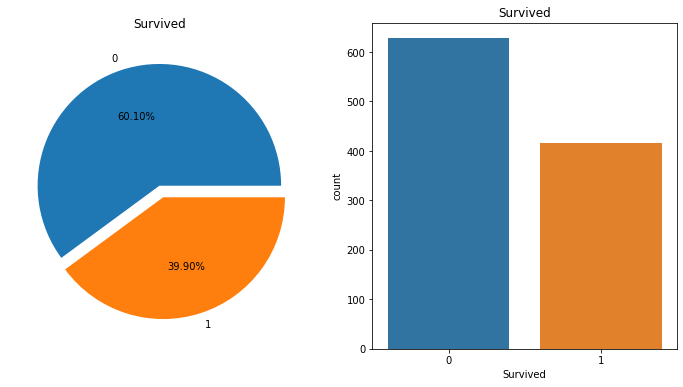

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f,ax=plt.subplots(1,2,figsize=(12,6))

titanic_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

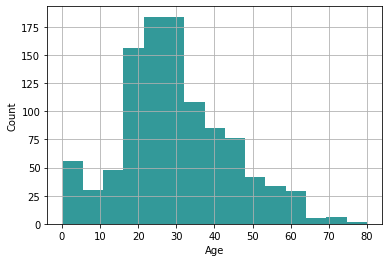

In [61]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [57]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,684.161972,0.598592,39.159930,0.475352,0.411972,92.229358
2,674.245211,0.429119,29.506705,0.417625,0.390805,21.855044
3,628.370000,0.270000,24.745000,0.564000,0.442000,12.879299


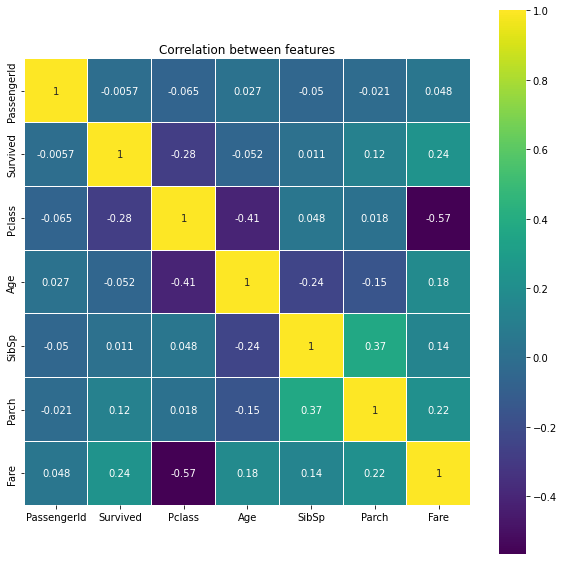

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_df.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


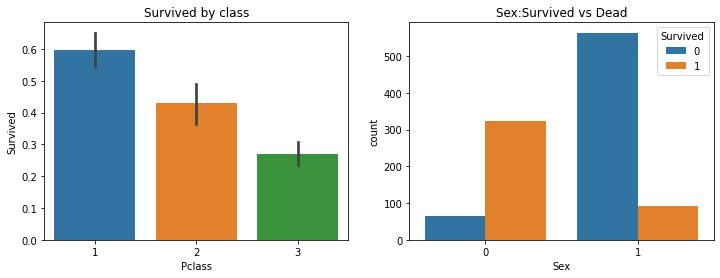

In [46]:
f,ax=plt.subplots(1,2,figsize=(12,4))
sns.barplot('Pclass', 'Survived', data=titanic_df, ax=ax[0])
ax[0].set_title('Survived by class')

sns.countplot('Sex',hue='Survived',data=titanic_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


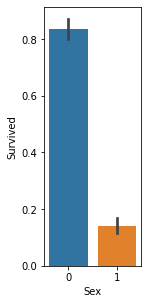

In [66]:
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=titanic_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

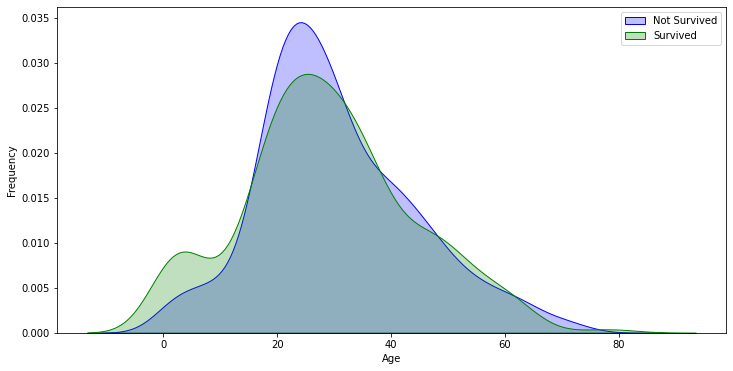

In [68]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 0) & (titanic_df["Age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 1) & (titanic_df["Age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [70]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic_df, test_size=0.2)

import pickle
with open('fifa_train.pkl', 'wb') as train_df:
    pickle.dump(train, train_df)
with open('fifa_test.pkl', 'wb') as test_df:
    pickle.dump(test, test_df)
with open('fifa_train.pkl', 'rb') as train_df:
    train = pickle.load(train_df)
    
with open('fifa_test.pkl', 'rb') as test_df:
    test = pickle.load(test_df)

In [72]:
from sklearn import tree
from sklearn import preprocessing

X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train[['Survived']]

X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_test = test[['Survived']]

X_train.shape, X_test.shape #열이 같아야함 (행은 데이터의 개수이기에 상관없음)

((836, 6), (209, 6))

In [73]:
#Researching for a best Parameter

depth = list(range(1,100,5))
sample_split = list(range(2,100,5))
sample_leaf = list(range(2,100,5))
random_state = list(range(1,100,5))
clf_list = []
for i in depth:
    for j in sample_split:
        for k in sample_leaf:
            for l in random_state:
                clf_list.append(tree.DecisionTreeClassifier(max_depth=i, 
                                                            min_samples_split=j,
                                                            min_samples_leaf=k, 
                                                            random_state=l).fit(X_train, y_train))

In [74]:
clf_list[-5:]

[DecisionTreeClassifier(max_depth=96, min_samples_leaf=97, min_samples_split=97,
                        random_state=76),
 DecisionTreeClassifier(max_depth=96, min_samples_leaf=97, min_samples_split=97,
                        random_state=81),
 DecisionTreeClassifier(max_depth=96, min_samples_leaf=97, min_samples_split=97,
                        random_state=86),
 DecisionTreeClassifier(max_depth=96, min_samples_leaf=97, min_samples_split=97,
                        random_state=91),
 DecisionTreeClassifier(max_depth=96, min_samples_leaf=97, min_samples_split=97,
                        random_state=96)]

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score_list = {}

for clf in clf_list:
    y_pred = clf.predict(X_test)
    accuracy_score_list[clf] = accuracy_score(y_test, y_pred)

In [76]:
len(accuracy_score_list)

160000

In [77]:
max_accuracy = max(list(accuracy_score_list.values()))
best_clf = list(accuracy_score_list.keys())[list(accuracy_score_list.values()).index(max_accuracy)]
best_clf

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=6)

In [78]:
### model test
pred = best_clf.predict(X_test)
print("accuracy : " + str( accuracy_score(y_test, pred)) ) #모델 예측 정확도 확인

accuracy : 0.8708133971291866


In [80]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test["Survived"]}) 
comparison #실제값과 예측값 비교

,prediction,ground_truth
769,0,0
372,0,0
707,0,1
1062,0,0
239,0,0
...,...,...
403,0,0
287,0,0
191,0,0
1245,1,1


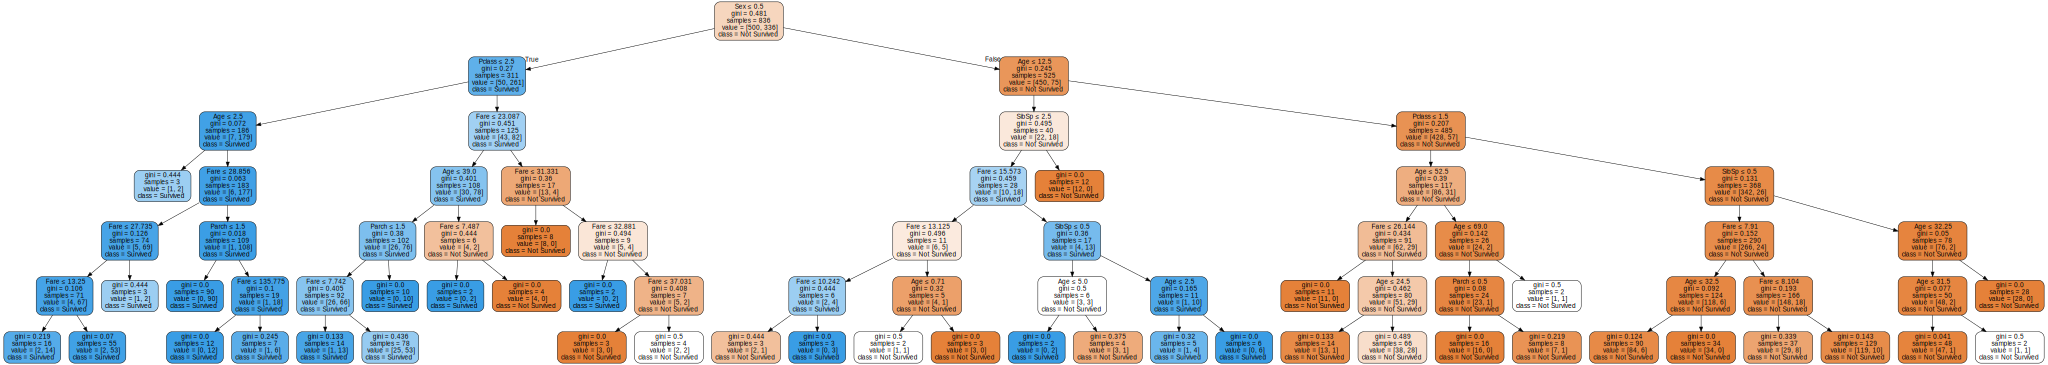

In [81]:
#의사결정트리 시각화
import graphviz
dot_data = tree.export_graphviz(best_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic survived")

dot_data = tree.export_graphviz(best_clf, out_file=None, 
                         feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                         class_names=['Not Survived', 'Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**gini** : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
**samples** : 노드 안에 들어 있는 데이터의 갯수  
**value** : 분류값 별 데이터의 갯수   
**class** :  분류값

https://hwangtoemat.github.io/dataanalysis-with-python/2019-06-11-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1-Decision-tree-%EC%99%80-Randomforest-%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0/
참조